In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Activation, Dropout, BatchNormalization, Flatten

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[0 1 2 3 4 5 6 7 8 9]


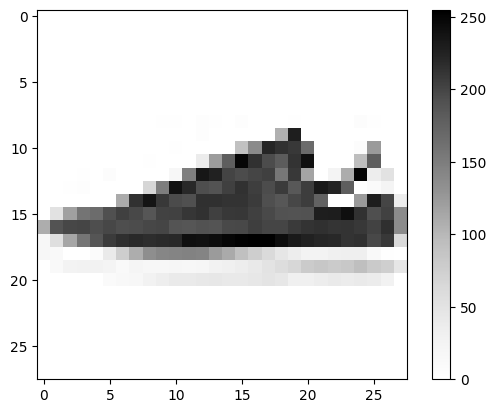

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
# (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)

print(np.unique(train_labels)) # [0 1 2 3 4 5 6 7 8 9]
# OneHotEncoding 해줄 필요가 없다.

plt.imshow(train_images[6], cmap='Grays')
plt.colorbar()
plt.show()
plt.close()


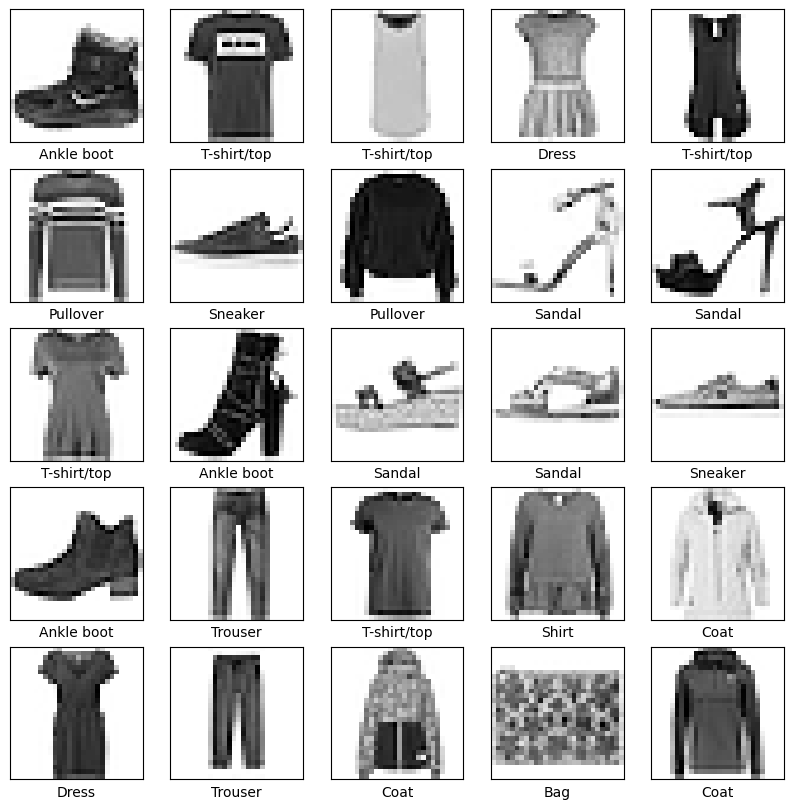

In [3]:
# 25개 이미지와 클래스 이름 함께 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Grays')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
# 데이터 값 조정 : 모델에 넣기 전 이미지 값의 범위는 0 ~ 1 사이로 조정해야 한다.
# 픽셀 값의 범위 0 ~ 255 사이이기 때문에 255로 나눠서 0 ~ 1 값을 갖도록 변환한다.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# 모델
model = Sequential()
model.add(Input(shape=(28,28 )))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# 학습 방법 정의
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(train_images, train_labels, epochs=8, batch_size=64, verbose=0, validation_split=0.2)

# 평가 
score = model.evaluate(test_images, test_labels, verbose=0)
print(f"loss : {score[0]}")
print(f"acc : {score[1]}")

loss : 0.48206451535224915
acc : 0.8342999815940857


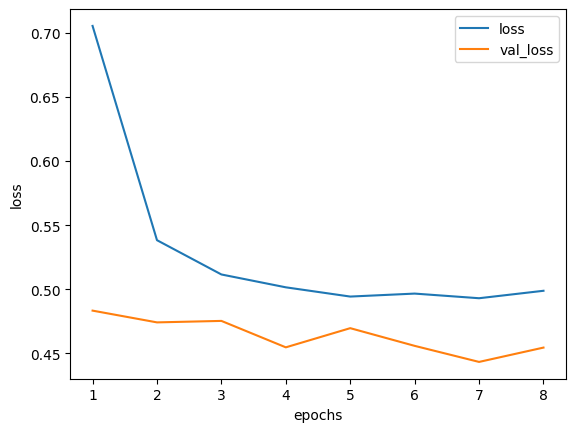

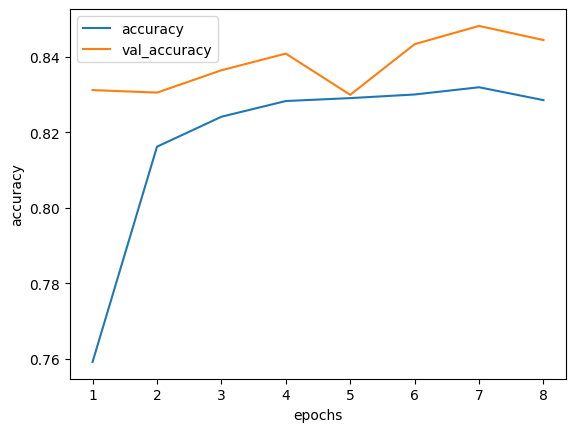

In [8]:
epochs = range(1, len(history.history['loss'])+ 1)
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.clf()
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

예측값 : 5
실제값 : 7


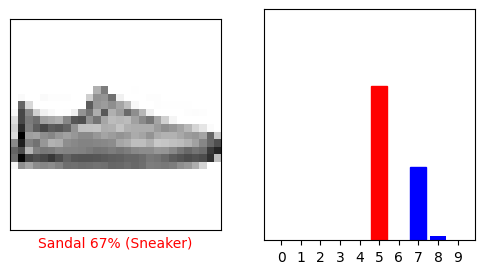

In [32]:
# 예측
pred = model.predict(test_images, verbose=0)

# print(f"예측값 : {np.argmax(pred[0])}")
# print(f"실제값 : {test_labels[0]}")

# 각 이미지 출력용 함수 (예측 어미지와 실제 레이블을 비교)
def plot_image(i, pred_arr, true_label, img):
    pred_arr, true_label, img = pred_arr[i], true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='Greys')
    
    pred_label = np.argmax(pred_arr)
    # 예측값과 실제값이 같으면 blue, 다르면 red
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                100*np.max(pred_arr),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, pred_arr, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_arr, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(pred_arr)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 12
print(f"예측값 : {np.argmax(pred[i])}")
print(f"실제값 : {test_labels[i]}")
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_labels)
plt.show()
    